In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [44]:
df.head()

,Age,AnnualIncome,SpendingScore,Male
0,19,15000,39,1
1,21,15000,81,1
2,20,16000,6,0
3,23,16000,77,0
4,31,17000,40,0


In [4]:
df.drop(labels=['CustomerID'], axis=1, inplace=True)

In [5]:
df.columns=df.columns.str.replace(" ","")

In [6]:
df.rename(columns={"Genre":"Sex"}, inplace=True)

In [7]:
df.rename(columns={"AnnualIncome(k$)":"AnnualIncome", "SpendingScore(1-100)":"SpendingScore"}, inplace=True)

In [8]:
df.AnnualIncome=df.AnnualIncome*1000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Sex              200 non-null object
Age              200 non-null int64
AnnualIncome     200 non-null int64
SpendingScore    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
dum=pd.get_dummies(df.Sex, drop_first=True)

In [11]:
df=pd.concat([df,dum], axis=1)

In [12]:
df.drop(labels=["Sex"], axis=1, inplace=True)

In [13]:
df.describe()

,Age,AnnualIncome,SpendingScore,Male
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000,0.440000
std,13.969007,26264.721165,25.823522,0.497633
min,18.000000,15000.000000,1.000000,0.000000
25%,28.750000,41500.000000,34.750000,0.000000
50%,36.000000,61500.000000,50.000000,0.000000
75%,49.000000,78000.000000,73.000000,1.000000
max,70.000000,137000.000000,99.000000,1.000000


([<matplotlib.axis.XTick at 0x11863ceb408>,
 <a list of 54 Text xticklabel objects>)

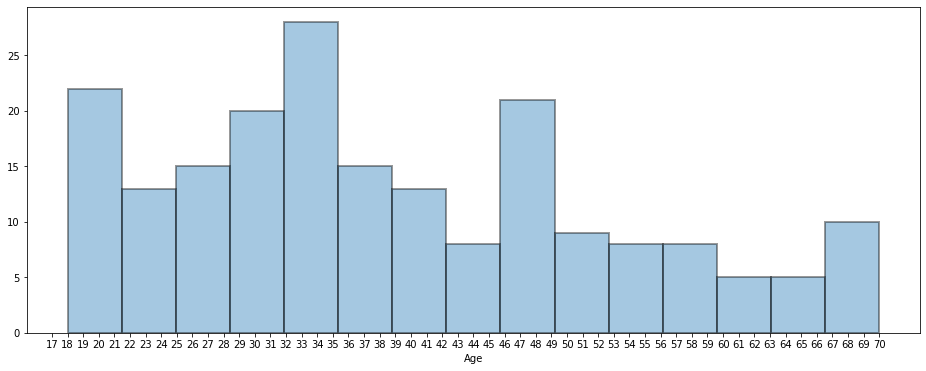

In [16]:
plt.figure(figsize=(16, 6))
sns.distplot(df.Age, kde=False, hist_kws=dict(edgecolor="k", lw=2), bins=15,)
plt.xticks(range(17,71))

There are mainly 3 types of customer based on Age. People who are in their early 20s, late 30s and very old people in their late 60s.
Most frequent visitors or customers are mainly middle adged between 28-35 years.

([<matplotlib.axis.XTick at 0x11864c49288>,
 <a list of 13 Text xticklabel objects>)

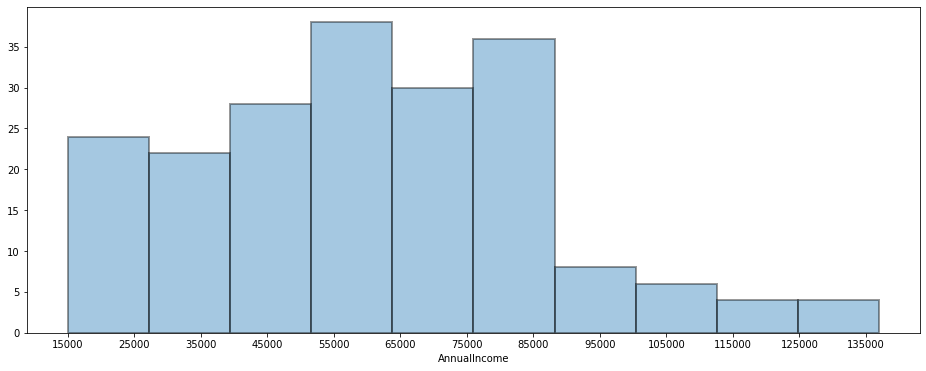

In [23]:
plt.figure(figsize=(16, 6))
sns.distplot(df.AnnualIncome, kde=False, hist_kws=dict(edgecolor="k", lw=2))
plt.xticks(range(15000,140000,10000))


Customers with annual income 45000 and 60500 are frequestist in the mall under test

([<matplotlib.axis.XTick at 0x1186a2a4c88>,
 <a list of 20 Text xticklabel objects>)

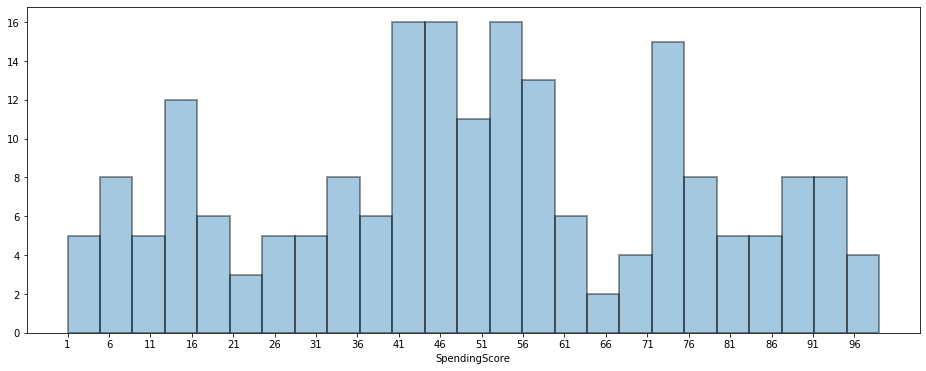

In [31]:
plt.figure(figsize=(16,6))
sns.distplot(df.SpendingScore, kde=False, hist_kws={'edgecolor':"k", "lw":2}, bins=25)
plt.xticks(range(1,100, 5))

There are some customers who scored very less like 16 or so
and then there are the mass of customers who score 40-56 or so
and there are customers who score in the range of 70s

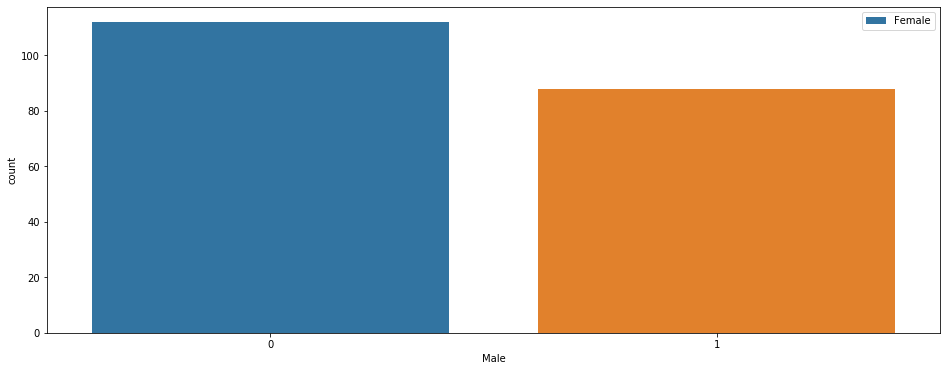

In [43]:
plt.figure(figsize=(16,6))
s=sns.countplot(df.Male)
plt.legend(labels=["Female","Male"])

Female seems to be the most frequent customers in the mall as compared to male.

<Figure size 1152x432 with 0 Axes>

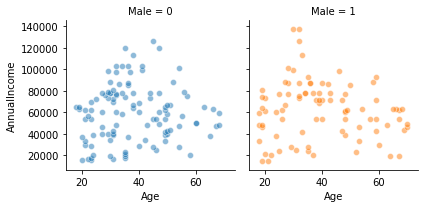

In [58]:
plt.figure(figsize=(16,6))
g=sns.FacetGrid(data=df,col='Male', hue="Male")
g=g.map(sns.scatterplot,"Age","AnnualIncome", alpha=0.5)


We have male customers who are in their late 30s with very high income

([<matplotlib.axis.YTick at 0x1186e39b3c8>,
 <a list of 11 Text yticklabel objects>)

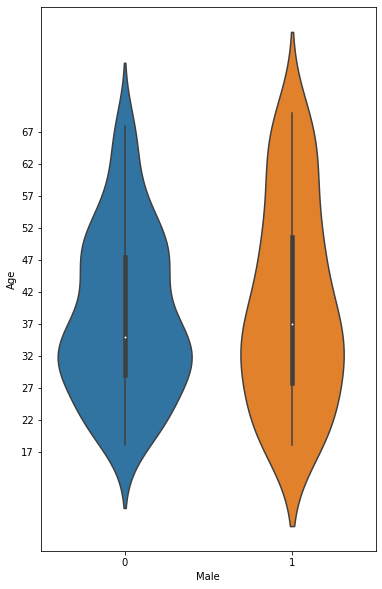

In [68]:
plt.figure(figsize=(6,10))
sns.violinplot(x="Male", y="Age", data=df)
plt.yticks(range(17,71,5))

In [81]:
df.Male=df.Male.astype('category')

In [86]:
df.pivot_table(index='Male', values='Age', aggfunc=("median","mean"))

,mean,median
Male,,
0,38.098214,35.0
1,39.806818,37.0


Middle aged customers in their late 30s are frequentist and possibly family person.



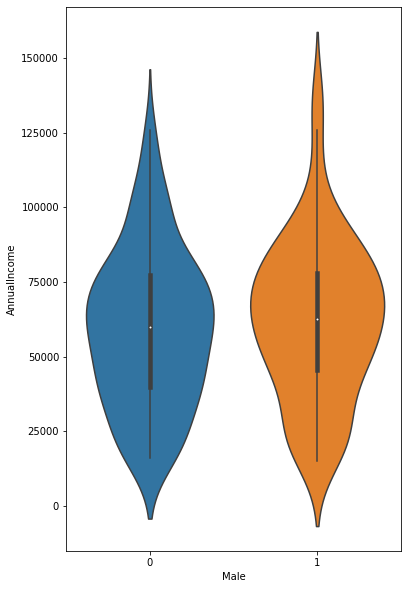

In [88]:
plt.figure(figsize=(6,10))
sns.violinplot(x="Male", y="AnnualIncome", data=df)

In [89]:
df.pivot_table(index='Male', values='AnnualIncome', aggfunc=("median","mean"))

,mean,median
Male,,
0,59250.000000,60000.0
1,62227.272727,62500.0


Male with larger annual income are frequentist in the mall as compared to female.

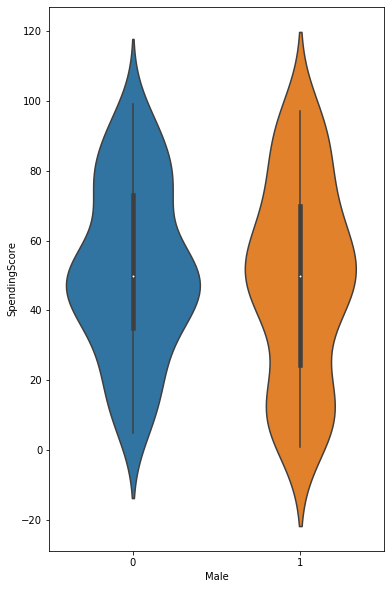

In [90]:
plt.figure(figsize=(6,10))
sns.violinplot(x="Male", y="SpendingScore", data=df)

In [91]:
df.pivot_table(index='Male', values='SpendingScore', aggfunc=("median","mean"))

,mean,median
Male,,
0,51.526786,50.0
1,48.511364,50.0


Spedning score is heigher for Female as compared to Male

<Figure size 1152x432 with 0 Axes>

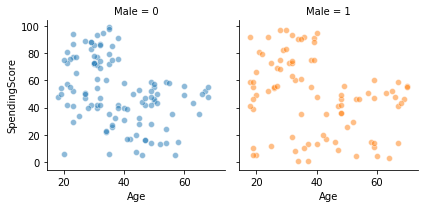

In [92]:
plt.figure(figsize=(16,6))
g=sns.FacetGrid(data=df,col='Male', hue="Male")
g=g.map(sns.scatterplot,"Age","SpendingScore", alpha=0.5)

In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [96]:
skl=MinMaxScaler()
skl_df=skl.fit_transform(df)

In [97]:
kmeans=KMeans(2)

In [98]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(skl_df)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [99]:
wcss

[86.68148216035944,
 37.27227241211876,
 29.552857611943857,
 22.39096001192855,
 19.06284091969291,
 16.43455254808258,
 14.204916470576652,
 12.259045177228936,
 10.866193173405524,
 9.399802915576307]

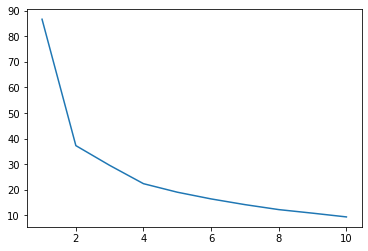

In [100]:
sns.lineplot(range(1,11), wcss)

I will go with 5 clusters

In [115]:
kmeans=KMeans(5, max_iter=900)

In [116]:
kmeans.fit(skl_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=900,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [117]:
kmeans.labels_

array([0, 0, 3, 1, 1, 1, 3, 1, 4, 1, 4, 1, 3, 1, 2, 0, 3, 0, 4, 1, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 1, 4, 1, 4, 0, 3, 1, 3, 1, 3, 1, 3, 0, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 4, 3, 4, 3, 4, 1, 4, 4, 0, 3, 3, 4, 0,
       3, 3, 0, 1, 4, 3, 3, 3, 4, 0, 3, 0, 1, 3, 4, 0, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 0, 4, 3, 1, 0, 3, 1, 4, 0, 1, 3, 4, 0, 4, 1, 3, 4, 4, 4,
       4, 1, 3, 0, 1, 1, 3, 3, 3, 3, 0, 3, 1, 0, 1, 1, 2, 0, 4, 0, 2, 0,
       1, 1, 2, 1, 3, 0, 2, 1, 3, 0, 1, 1, 2, 0, 4, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1,
       4, 0, 4, 0, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 3, 0,
       2, 0])

In [119]:
kmeans.predict(skl_df)

array([0, 0, 3, 1, 1, 1, 3, 1, 4, 1, 4, 1, 3, 1, 2, 0, 3, 0, 4, 1, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 1, 4, 1, 4, 0, 3, 1, 3, 1, 3, 1, 3, 0, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 4, 3, 4, 3, 4, 1, 4, 4, 0, 3, 3, 4, 0,
       3, 3, 0, 1, 4, 3, 3, 3, 4, 0, 3, 0, 1, 3, 4, 0, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 0, 4, 3, 1, 0, 3, 1, 4, 0, 1, 3, 4, 0, 4, 1, 3, 4, 4, 4,
       4, 1, 3, 0, 1, 1, 3, 3, 3, 3, 0, 3, 1, 0, 1, 1, 2, 0, 4, 0, 2, 0,
       1, 1, 2, 1, 3, 0, 2, 1, 3, 0, 1, 1, 2, 0, 4, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1,
       4, 0, 4, 0, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 3, 0,
       2, 0])

In [120]:
kmeans.cluster_centers_

array([[ 2.05586081e-01,  3.76268540e-01,  7.06511176e-01,
         1.00000000e+00],
       [ 2.00742240e-01,  3.66120219e-01,  6.80451128e-01,
        -3.33066907e-16],
       [ 3.35972851e-01,  5.49180328e-01,  1.20648259e-01,
         1.00000000e+00],
       [ 5.79020979e-01,  3.59165425e-01,  3.44712430e-01,
        -3.33066907e-16],
       [ 7.77851459e-01,  3.07801018e-01,  3.77199156e-01,
         1.00000000e+00]])

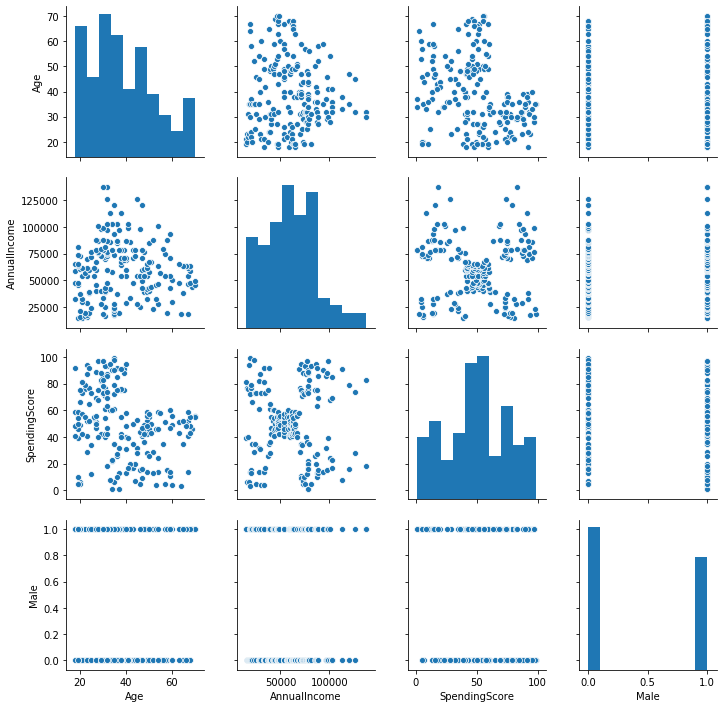

In [114]:
sns.pairplot(df)

# So 4 possible clusters can be as follows:
1> Low Spending Score Low Annual Income (Poor) #unreliable

2> Medium Spending Score Medium Annual Income (Middle) #they should be retained and acquired as they are common people and are more in numbers

3> High Spending Score High Annual Income (Rich) #should be acquired/retained as they are the main source of profit fo the mall

4> High Spending Score Low Annual Income (Spend Thrift) #not reliable they are just trying out the mall

5> Low Spending Score High Annual Income (New Customers) #should be acquired as they can be converted to possible frequentist
